In [20]:
import pandas as pd
df = pd.read_excel('../data/raw/AmazonSalesData.csv.xlsx')
df.head()
df.isnull().sum()
df.dropna(inplace=True)
df.dropna(axis=1, inplace = True)
df.duplicated().sum()
# Remove all duplicate rows
df.drop_duplicates(inplace=True)




<Axes: xlabel='Total Profit'>

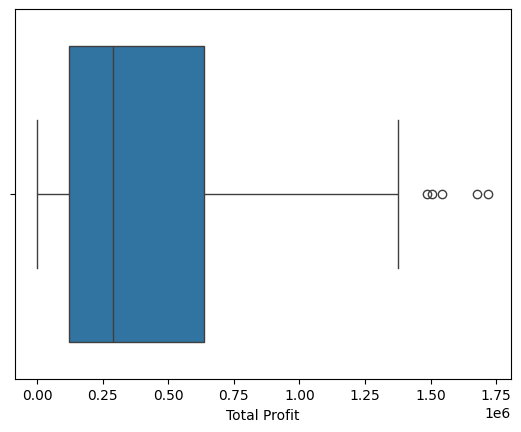

In [21]:
import seaborn as sns
sns.boxplot(x=df['Total Profit'])

In [22]:
df.to_csv('../data/processed/cleaned_sales_data.csv', index=False)

In [25]:
import pandas as pd

# Load the cleaned data from the 'processed' folder
df = pd.read_csv('../data/processed/cleaned_sales_data.csv')

# Display a summary of the cleaned data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
#Get the top 10 products by total revenue
top_products = df.groupby('Item Type')['Total Revenue'].sum().nlargest(10)

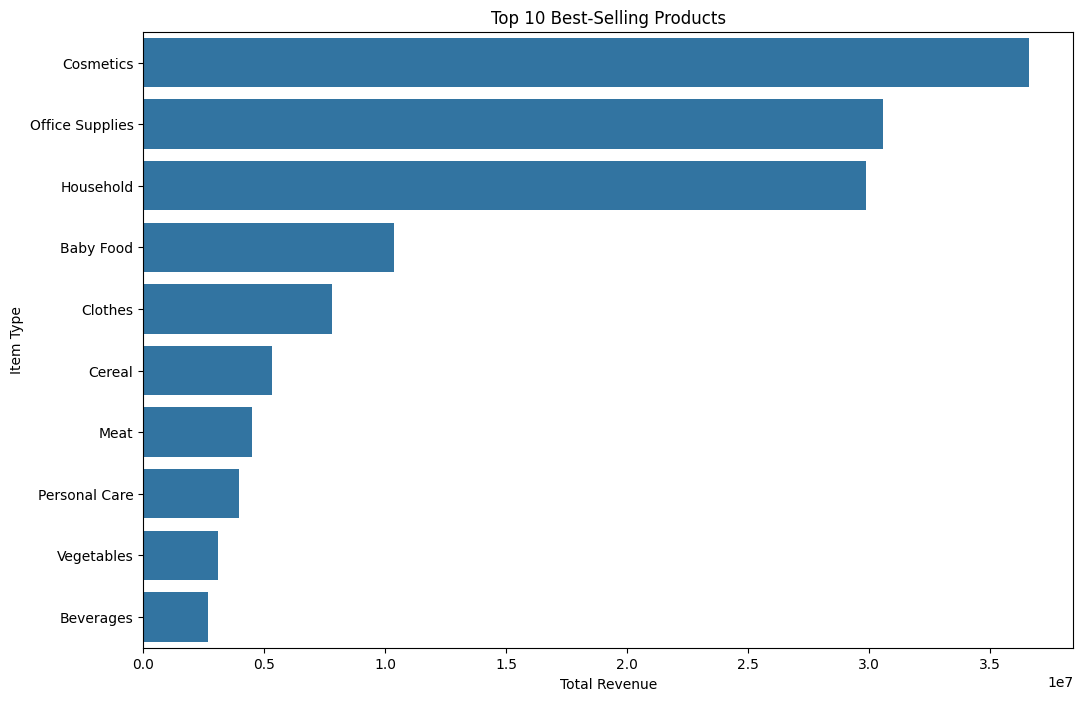

In [30]:
import matplotlib.pyplot as plt
#Plot a bar chart to visualize the results
plt.figure(figsize=(12,8))
sns.barplot(x=top_products.values,y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
plt.show()

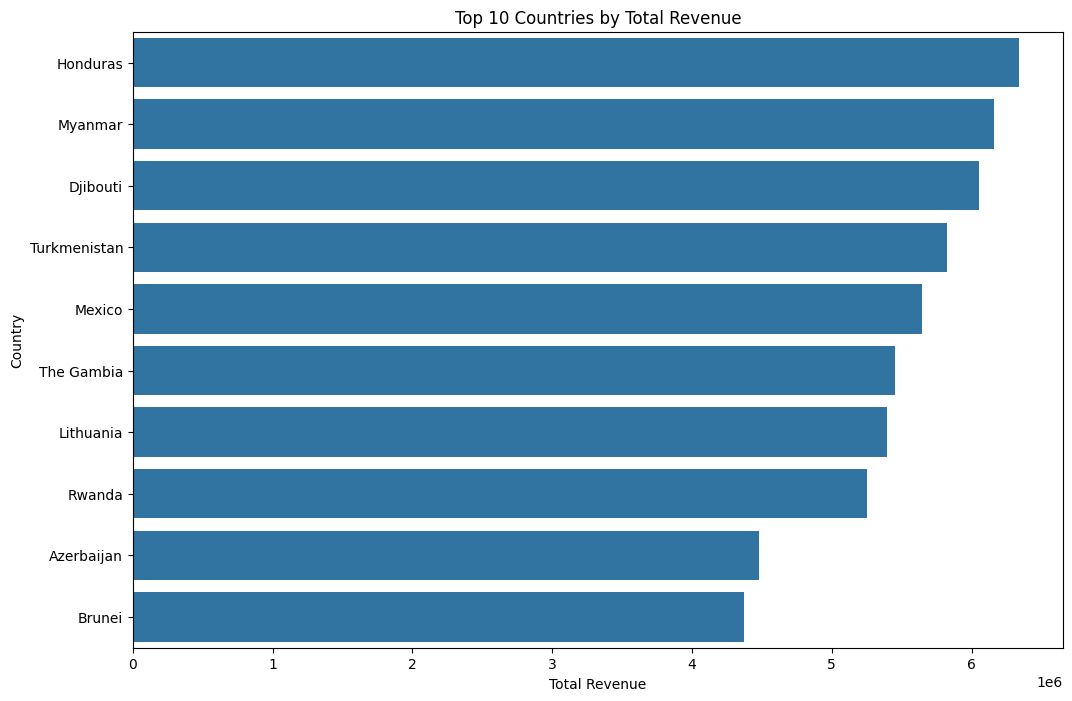

In [31]:
import matplotlib.pyplot as plt
#Get the sales by city
sales_by_country = df.groupby('Country')['Total Revenue'].sum().nlargest(10)
#Plot the results
plt.figure(figsize=(12,8))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index) 
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country') 
plt.show()



In [33]:
#Group by Top 10 Customer ID and sum their total revenue
customer_spending = df.groupby('Order ID')['Total Revenue'].sum() 
#Find top 10 Customer based on the total spending
top_10_customers = customer_spending.nlargest(10)
print("Top 10 Customers by the Total Revenue:")
print(top_10_customers)

Top 10 Customers by the Total Revenue:
Order ID
522840487    5997054.98
177713572    5513227.50
166460740    5396577.27
986435210    4647149.58
320009267    4368316.68
231145322    4324782.40
670854651    4220728.80
331438481    3876652.40
249693334    3786589.20
177636754    3593376.78
Name: Total Revenue, dtype: float64


C:\Users\palpu\AppData\Local\Temp\ipykernel_37812\3166551026.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_customers.values,y=top_10_customers.index,palette = 'viridis')


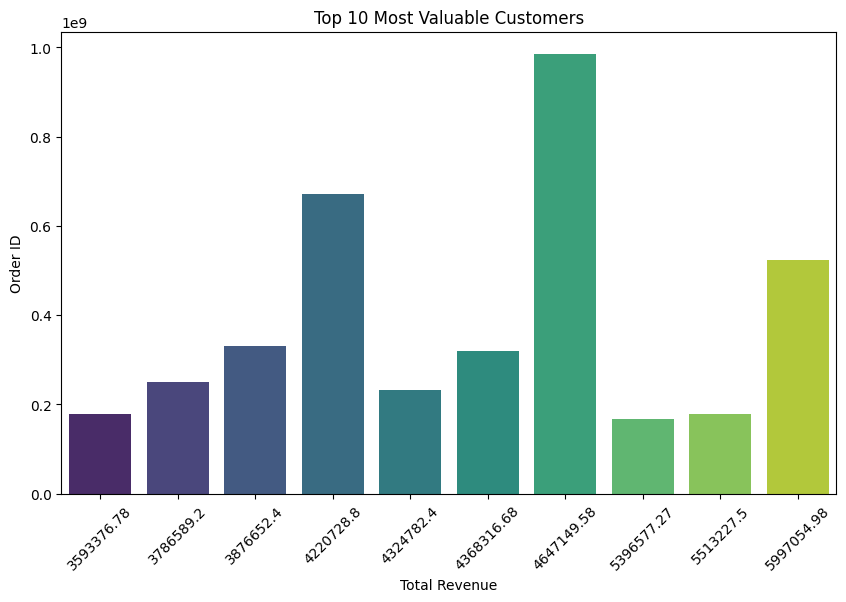

In [35]:
#Visualize the Results
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_customers.values,y=top_10_customers.index,palette = 'viridis')
plt.title('Top 10 Most Valuable Customers')
plt.xlabel('Total Revenue')
plt.ylabel('Order ID')
plt.xticks(rotation=45)
plt.show()


In [45]:
#Analyze Average Items Per Order
#Group BY Order ID and sum the quantity of items
items_per_order = df.groupby('Order ID')['Units Sold'].sum()
#Calculate the average number of items per order
average_items_per_order = items_per_order.mean()
print(f"The average number of items per order is:{average_items_per_order:.2f}")

The average number of items per order is:5128.71


In [39]:
#Overall sales Performance and Total Revenue
#Calculate the total revenue
total_revenue = df['Total Revenue'].sum()
#Calculate the total number of transactions
total_transactions = df['Total Revenue'].count()
print(f"Total Revenue : ${total_revenue:,.2f}")
print(f"Total Transactions:{total_transactions}")

Total Revenue : $137,348,768.31
Total Transactions:100


In [42]:
#Average Order Value/AOV
#Get the total number of unique orders
total_orders = df['Order ID'].nunique()
#Calculate the Averahe Order Value
aov = total_revenue/total_orders
print(f"Total Orders:{total_orders} ")
print(f"Average Order Value (AOV):${aov:,.2f}")



Total Orders:100 
Average Order Value (AOV):$1,373,487.68


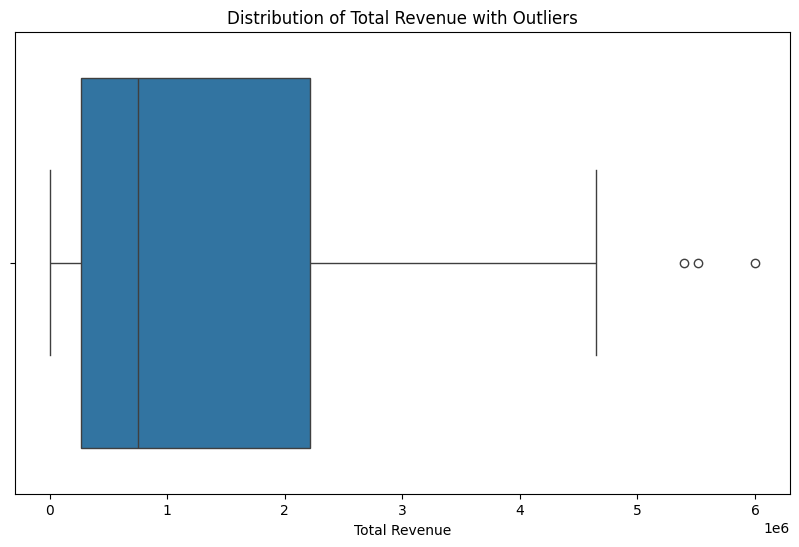

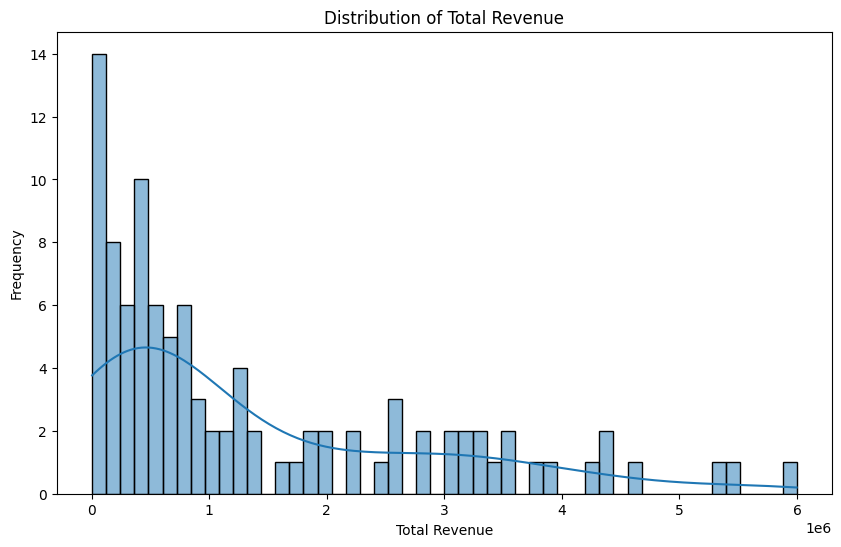

In [44]:
#Analyze the Distribution of Sales and Outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Total Revenue'])
plt.title('Distribution of Total Revenue with Outliers')
plt.xlabel('Total Revenue')
plt.show()

#To get more detailed view, we can a use a histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Total Revenue'], bins=50,kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()
